In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch

from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

from sklearn.metrics import silhouette_score,calinski_harabasz_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import warnings 
warnings.filterwarnings("ignore")

In [2]:
crime_info=pd.read_csv("crime_data.csv")
crime_info


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [3]:
crime_info.isnull().sum()


Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [4]:
crime_info.describe()


,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [5]:
crime_info.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


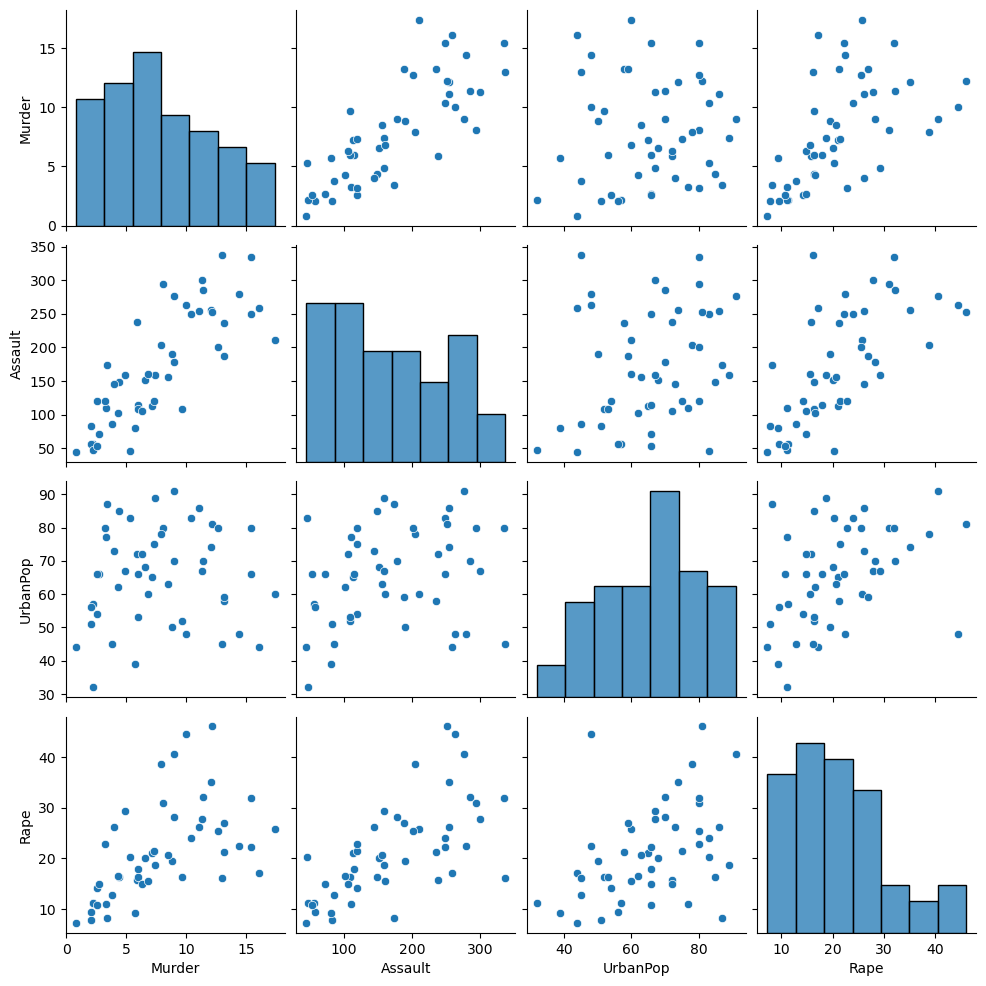

In [6]:
sns.pairplot(crime_info)
plt.show()

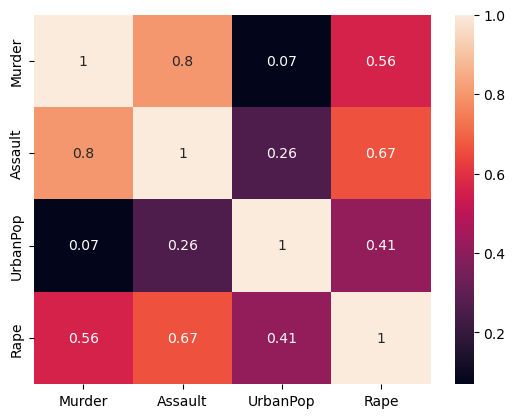

In [7]:
corr=crime_info.corr()
sns.heatmap(corr,annot=True)
plt.show()

In [8]:
label_enc=LabelEncoder()
crime_info['Unnamed: 0']=label_enc.fit_transform(crime_info['Unnamed: 0'])
crime_info

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,0,13.2,236,58,21.2
1,1,10.0,263,48,44.5
2,2,8.1,294,80,31.0
3,3,8.8,190,50,19.5
4,4,9.0,276,91,40.6
5,5,7.9,204,78,38.7
6,6,3.3,110,77,11.1
7,7,5.9,238,72,15.8
8,8,15.4,335,80,31.9
9,9,17.4,211,60,25.8


In [9]:
scaler=MinMaxScaler()
new_feature=scaler.fit_transform(crime_info)
crime_dt=pd.DataFrame(new_feature,columns=crime_info.columns)
crime_dt

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,0.000000,0.746988,0.654110,0.440678,0.359173
1,0.020408,0.554217,0.746575,0.271186,0.961240
2,0.040816,0.439759,0.852740,0.813559,0.612403
3,0.061224,0.481928,0.496575,0.305085,0.315245
4,0.081633,0.493976,0.791096,1.000000,0.860465
5,0.102041,0.427711,0.544521,0.779661,0.811370
6,0.122449,0.150602,0.222603,0.762712,0.098191
7,0.142857,0.307229,0.660959,0.677966,0.219638
8,0.163265,0.879518,0.993151,0.813559,0.635659
9,0.183673,1.000000,0.568493,0.474576,0.478036


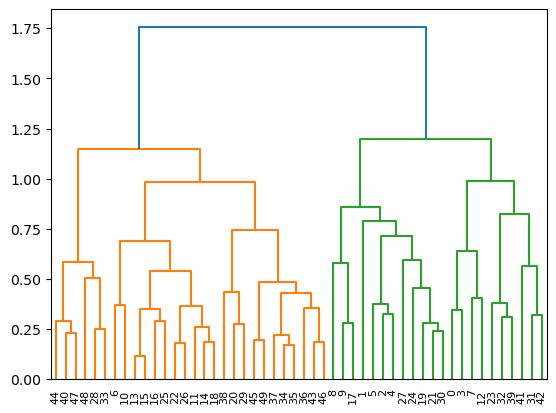

In [10]:
dendrogram=sch.dendrogram(sch.linkage(crime_dt,method='complete'))


In [11]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean')
hc

AgglomerativeClustering(affinity='euclidean', n_clusters=4)

In [12]:
y_hc=hc.fit_predict(crime_dt)
y_hc

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 2, 0,
       1, 0, 0, 1, 1, 0, 3, 2, 0, 0, 0, 3, 2, 2, 2, 2, 2, 0, 3, 0, 0, 2,
       3, 2, 2, 3, 3, 2], dtype=int64)

In [13]:

cluster=pd.DataFrame(y_hc,columns=['cluster'])
cluster.head()

,cluster
0,0
1,0
2,0
3,0
4,0


In [14]:
crime_dt['cluster']=cluster


In [15]:
crime_dt

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,0.000000,0.746988,0.654110,0.440678,0.359173,0
1,0.020408,0.554217,0.746575,0.271186,0.961240,0
2,0.040816,0.439759,0.852740,0.813559,0.612403,0
3,0.061224,0.481928,0.496575,0.305085,0.315245,0
4,0.081633,0.493976,0.791096,1.000000,0.860465,0
5,0.102041,0.427711,0.544521,0.779661,0.811370,0
6,0.122449,0.150602,0.222603,0.762712,0.098191,1
7,0.142857,0.307229,0.660959,0.677966,0.219638,0
8,0.163265,0.879518,0.993151,0.813559,0.635659,0
9,0.183673,1.000000,0.568493,0.474576,0.478036,0


In [16]:
crime_dt[crime_dt['cluster']==0]

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,0.000000,0.746988,0.654110,0.440678,0.359173,0
1,0.020408,0.554217,0.746575,0.271186,0.961240,0
2,0.040816,0.439759,0.852740,0.813559,0.612403,0
3,0.061224,0.481928,0.496575,0.305085,0.315245,0
4,0.081633,0.493976,0.791096,1.000000,0.860465,0
5,0.102041,0.427711,0.544521,0.779661,0.811370,0
7,0.142857,0.307229,0.660959,0.677966,0.219638,0
8,0.163265,0.879518,0.993151,0.813559,0.635659,0
9,0.183673,1.000000,0.568493,0.474576,0.478036,0
12,0.244898,0.578313,0.698630,0.864407,0.431525,0


In [17]:
crime_dt[crime_dt['cluster']==1].head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
6,0.122449,0.150602,0.222603,0.762712,0.098191,1
10,0.204082,0.271084,0.003425,0.864407,0.333333,1
11,0.224490,0.108434,0.256849,0.372881,0.178295,1
13,0.265306,0.385542,0.232877,0.559322,0.354005,1
14,0.285714,0.084337,0.037671,0.423729,0.103359,1


In [18]:
crime_dt[crime_dt['cluster']==2].head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
20,0.408163,0.216867,0.356164,0.898305,0.232558,2
29,0.591837,0.397590,0.390411,0.966102,0.297158,2
34,0.693878,0.391566,0.256849,0.728814,0.364341,2
35,0.714286,0.349398,0.363014,0.610169,0.328165,2
36,0.734694,0.246988,0.390411,0.593220,0.568475,2


In [19]:
crime_dt[crime_dt['cluster']==3].head()


,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
28,0.571429,0.078313,0.041096,0.406780,0.056848,3
33,0.673469,0.000000,0.000000,0.203390,0.000000,3
40,0.816327,0.180723,0.140411,0.220339,0.142119,3
44,0.897959,0.084337,0.010274,0.000000,0.100775,3
47,0.959184,0.295181,0.123288,0.118644,0.051680,3


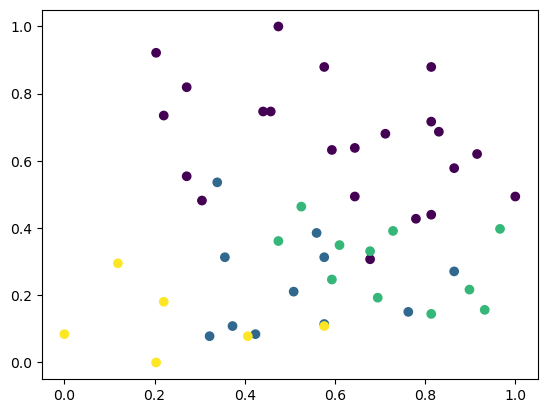

In [20]:
plt.scatter(crime_dt['UrbanPop'],crime_dt['Murder'],c=hc.labels_)
plt.show()

In [21]:
crime_dt=crime_dt.drop('cluster',axis=1)

In [22]:
crime_dt.head(10)


,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,0.000000,0.746988,0.654110,0.440678,0.359173
1,0.020408,0.554217,0.746575,0.271186,0.961240
2,0.040816,0.439759,0.852740,0.813559,0.612403
3,0.061224,0.481928,0.496575,0.305085,0.315245
4,0.081633,0.493976,0.791096,1.000000,0.860465
5,0.102041,0.427711,0.544521,0.779661,0.811370
6,0.122449,0.150602,0.222603,0.762712,0.098191
7,0.142857,0.307229,0.660959,0.677966,0.219638
8,0.163265,0.879518,0.993151,0.813559,0.635659
9,0.183673,1.000000,0.568493,0.474576,0.478036


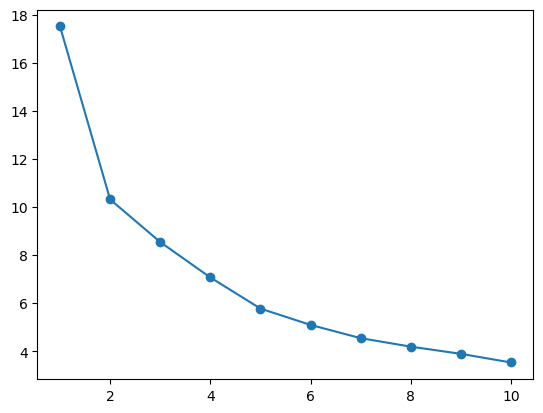

In [23]:
nc=range(1,11)
inertia=[]
for i in nc:
    cluster=KMeans(n_clusters=i)
    label=cluster.fit(crime_dt)
    inertia.append(label.inertia_)
plt.scatter(nc,inertia)
plt.plot(nc,inertia)
plt.show()


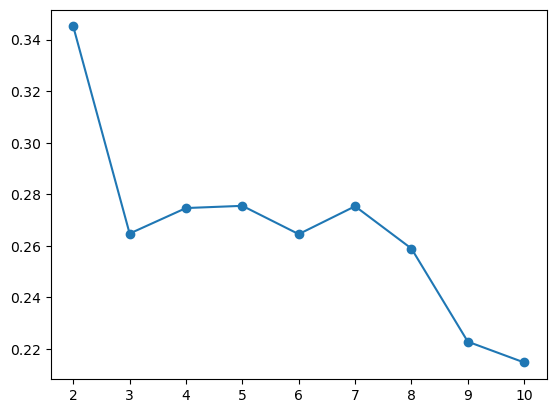

In [24]:
nc=range(2,11)
sil=[]
for i in nc:
    cluster1=KMeans(n_clusters=i)
    label1=cluster1.fit_predict(crime_dt)
    sil.append(silhouette_score(crime_dt,label1))
plt.scatter(nc,sil)
plt.plot(nc,sil)
sil
plt.show()

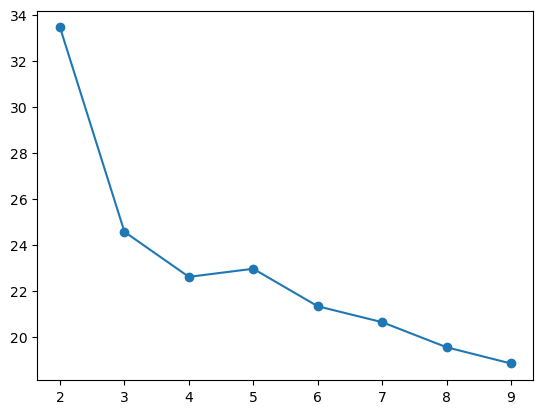

In [25]:
nc=range(2,10)
cal=[]
for i in nc:
    cluster2=KMeans(n_clusters=i)
    label2=cluster2.fit_predict(crime_dt)
    cal.append(calinski_harabasz_score(crime_dt,label2))
plt.scatter(nc,cal)
plt.plot(nc,cal)
cal
plt.show()

In [26]:
kmean_cluster=KMeans(n_clusters=2)
cluster=kmean_cluster.fit_predict(crime_dt)
cluster

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1])

In [27]:
crime_dt['cluster']=cluster


In [28]:
crime_dt

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster
0,0.000000,0.746988,0.654110,0.440678,0.359173,0
1,0.020408,0.554217,0.746575,0.271186,0.961240,0
2,0.040816,0.439759,0.852740,0.813559,0.612403,0
3,0.061224,0.481928,0.496575,0.305085,0.315245,0
4,0.081633,0.493976,0.791096,1.000000,0.860465,0
5,0.102041,0.427711,0.544521,0.779661,0.811370,0
6,0.122449,0.150602,0.222603,0.762712,0.098191,1
7,0.142857,0.307229,0.660959,0.677966,0.219638,0
8,0.163265,0.879518,0.993151,0.813559,0.635659,0
9,0.183673,1.000000,0.568493,0.474576,0.478036,0


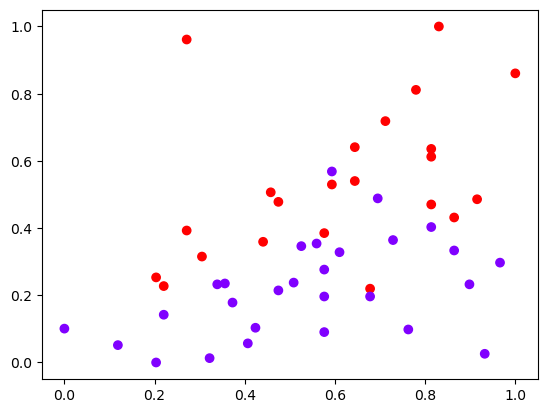

In [29]:
plt.scatter(crime_dt['UrbanPop'],crime_dt['Rape'],c=cluster,cmap=plt.cm.rainbow_r)
plt.show()

In [30]:
crime_dt=crime_dt.drop('cluster',axis=1)
crime_dt

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,0.000000,0.746988,0.654110,0.440678,0.359173
1,0.020408,0.554217,0.746575,0.271186,0.961240
2,0.040816,0.439759,0.852740,0.813559,0.612403
3,0.061224,0.481928,0.496575,0.305085,0.315245
4,0.081633,0.493976,0.791096,1.000000,0.860465
5,0.102041,0.427711,0.544521,0.779661,0.811370
6,0.122449,0.150602,0.222603,0.762712,0.098191
7,0.142857,0.307229,0.660959,0.677966,0.219638
8,0.163265,0.879518,0.993151,0.813559,0.635659
9,0.183673,1.000000,0.568493,0.474576,0.478036


In [36]:
cl_db=DBSCAN(eps=.3,min_samples=3)
cluster_db=cl_db.fit_predict(crime_dt)
cluster_db

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  0,  0,  0,
       -1,  0,  1,  2,  1,  0, -1, -1,  0,  0, -1,  0,  2,  1, -1, -1,  0,
        2,  2,  2,  2, -1, -1,  3, -1, -1,  2,  3,  2,  2,  3, -1,  2],
      dtype=int64)

In [37]:
crime_dt['cluster_db']=cluster_db
crime_dt

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,cluster_db
0,0.000000,0.746988,0.654110,0.440678,0.359173,-1
1,0.020408,0.554217,0.746575,0.271186,0.961240,-1
2,0.040816,0.439759,0.852740,0.813559,0.612403,-1
3,0.061224,0.481928,0.496575,0.305085,0.315245,-1
4,0.081633,0.493976,0.791096,1.000000,0.860465,-1
5,0.102041,0.427711,0.544521,0.779661,0.811370,-1
6,0.122449,0.150602,0.222603,0.762712,0.098191,-1
7,0.142857,0.307229,0.660959,0.677966,0.219638,-1
8,0.163265,0.879518,0.993151,0.813559,0.635659,-1
9,0.183673,1.000000,0.568493,0.474576,0.478036,-1


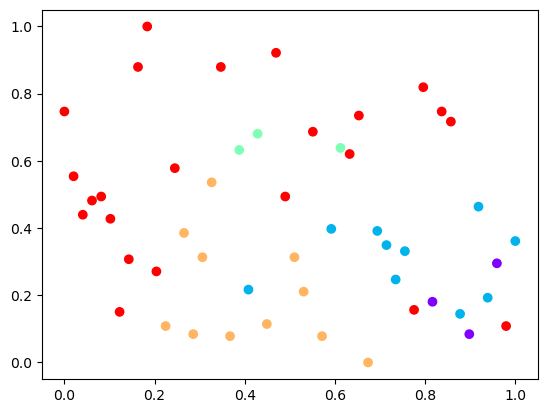

In [38]:
plt.scatter(crime_dt['Unnamed: 0'],crime_dt['Murder'],c=cluster_db,cmap=plt.cm.rainbow_r)
plt.show()